![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from IPython.display import display
pd.options.display.float_format = '{:,.2f}'.format
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt



In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.39,81,0.00,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.63,80,0.00,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.63,80,0.00,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.39,75,0.00,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.39,75,0.00,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1   116.34
2   215.25
3   234.42
4   198.99
Name: total, dtype: float64

In [5]:
bikes.season.value_counts(sort = False)

1    2686
2    2733
3    2733
4    2734
Name: season, dtype: int64

In [6]:
bikes.groupby('season').total.sum()

season
1    312498
2    588282
3    640662
4    544034
Name: total, dtype: int64

In [7]:
bikes.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
count,"10,886.00","10,886.00","10,886.00","10,886.00","10,886.00","10,886.00","10,886.00","10,886.00","10,886.00","10,886.00","10,886.00","10,886.00"
mean,2.51,0.03,0.68,1.42,20.23,23.66,61.89,12.80,36.02,155.55,191.57,11.54
std,1.12,0.17,0.47,0.63,7.79,8.47,19.25,8.16,49.96,151.04,181.14,6.92
min,1.00,0.00,0.00,1.00,0.82,0.76,0.00,0.00,0.00,0.00,1.00,0.00
25%,2.00,0.00,0.00,1.00,13.94,16.66,47.00,7.00,4.00,36.00,42.00,6.00
50%,3.00,0.00,1.00,1.00,20.50,24.24,62.00,13.00,17.00,118.00,145.00,12.00
75%,4.00,0.00,1.00,2.00,26.24,31.06,77.00,17.00,49.00,222.00,284.00,18.00
max,4.00,1.00,1.00,4.00,41.00,45.45,100.00,57.00,367.00,886.00,977.00,23.00


Los datos permiten observar, que el mayor número de alquiler de bicicletas se da en verano, teniendo más del doble de alquileres que la termporada de invierno.  Es importante resaltar que se tiene un número de observaciones muy similar para las cuatro temporadas del año.

In [8]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0     55.14
1     33.86
2     22.90
3     11.76
4      6.41
5     19.77
6     76.26
7    213.12
8    362.77
9    221.78
10   175.09
11   210.67
12   256.51
13   257.79
14   243.44
15   254.30
16   316.37
17   468.77
18   430.86
19   315.28
20   228.52
21   173.37
22   133.58
23    89.51
Name: total, dtype: float64

In [9]:
bikes.groupby('hour').total.count()

hour
0     455
1     454
2     448
3     433
4     442
5     452
6     455
7     455
8     455
9     455
10    455
11    455
12    456
13    456
14    456
15    456
16    456
17    456
18    456
19    456
20    456
21    456
22    456
23    456
Name: total, dtype: int64

In [10]:
bikes.hour.value_counts(sort = False)

0     455
1     454
2     448
3     433
4     442
5     452
6     455
7     455
8     455
9     455
10    455
11    455
12    456
13    456
14    456
15    456
16    456
17    456
18    456
19    456
20    456
21    456
22    456
23    456
Name: hour, dtype: int64

In [11]:
for x in bikes.hour.unique():
    suma = bikes[bikes.hour == x].total.sum()
    print(f'En la hora {x} se alquila el {round(suma/bikes.total.sum()*100,2)}%')

En la hora 0 se alquila el 1.2%
En la hora 1 se alquila el 0.74%
En la hora 2 se alquila el 0.49%
En la hora 3 se alquila el 0.24%
En la hora 4 se alquila el 0.14%
En la hora 5 se alquila el 0.43%
En la hora 6 se alquila el 1.66%
En la hora 7 se alquila el 4.65%
En la hora 8 se alquila el 7.91%
En la hora 9 se alquila el 4.84%
En la hora 10 se alquila el 3.82%
En la hora 11 se alquila el 4.6%
En la hora 12 se alquila el 5.61%
En la hora 13 se alquila el 5.64%
En la hora 14 se alquila el 5.32%
En la hora 15 se alquila el 5.56%
En la hora 16 se alquila el 6.92%
En la hora 17 se alquila el 10.25%
En la hora 18 se alquila el 9.42%
En la hora 19 se alquila el 6.89%
En la hora 20 se alquila el 5.0%
En la hora 21 se alquila el 3.79%
En la hora 22 se alquila el 2.92%
En la hora 23 se alquila el 1.96%


In [12]:
bikes.pivot_table(index='hour', columns = 'season', values='total')

season,1,2,3,4
hour,,,,
0,28.29,58.47,75.68,57.88
1,18.76,35.64,44.83,36.17
2,13.21,23.48,31.71,22.68
3,7.76,11.71,15.78,11.17
4,3.34,6.63,8.09,7.23
5,10.30,20.38,25.73,22.33
6,42.73,82.98,96.78,82.25
7,124.43,232.26,264.04,230.96
8,253.35,390.19,403.51,403.07


 - Entre las 5 y las 7 de la tarde, se alquila el 27% del total de bicicletas, siendo la hora pico de alquiler las 5pm. 
 - En horas de la mañana se observa un pico a las 8am con el 7.91%.  
 - De igual forma es posible observar que el incremento de alquier de bicicletas en verano es constante en todos los rangos horarios, en comparación con otras temporadas del año.
 - El máximo de alquileres se da en verano, con un total de 640.662
 - Los datos poseen una distribución muy similiar, lo cual evita sesgos al momento de realizar el análisis descriptivo.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<AxesSubplot:xlabel='hour'>

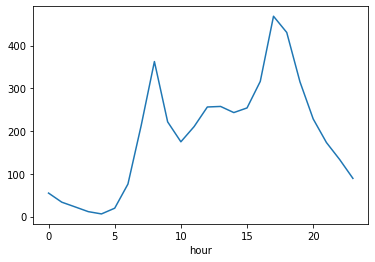

In [13]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

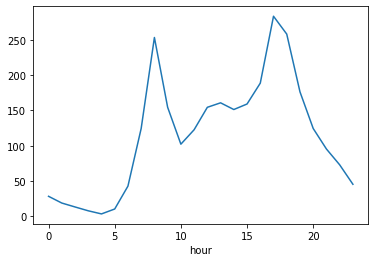

In [14]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes.season==1].groupby('hour').total.mean().plot()

<AxesSubplot:xlabel='hour'>

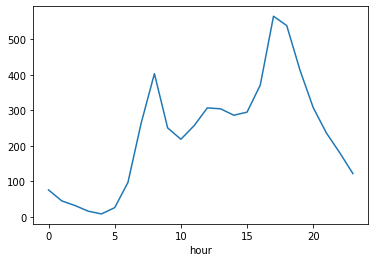

In [15]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes.season==3].groupby('hour').total.mean().plot()

El comportamiento de alquiler y los picos promedio son contantes en las temporadadas de inverno y verano, las cuales a su vez están alienadas al comportamiento total.  Sin embargo, en las gráficas es posible constatar los datos analizados en el punto anterior, al hacer visible que en verano el promedio es mucho mayor al de invierno, superando las 500 bicicletas en la hora pico de la tarde, en comparación con las menos de 300 de la hora pico de la tarde de invierno.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [16]:
#se eligen las variables predictoras
Xinit = bikes[["season","hour"]].reset_index(drop=True)
#se transforma la variable season a string
Xinit["season"] = Xinit["season"].astype('string')
#se transforma la variable categorica season en binaria (dummies)
X = pd.get_dummies(data=Xinit, columns=['season'])
#se selecciona la variable a predecir
Y = bikes['total'].reset_index(drop=True)
#se dividen los datos entre entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
#se crea el modelo de regresión lineal
regresion = LinearRegression()
#se entrena el modelo
regresion.fit(X_train,y_train)
#se ge
print("Intercept:", regresion.intercept_)
print('\n')
print("Coeficiente:", list(zip(X_train, regresion.coef_.flatten(), )))
print('\n')
print("Coeficiente de determinación R^2:", regresion.score(X_train,  y_train))

LinearRegression()

Intercept: 68.69222309801074


Coeficiente: [('hour', 10.505413070260058), ('season_1', -74.39013808089057), ('season_2', 20.344636255438985), ('season_3', 44.922105460556075), ('season_4', 9.123396364895411)]


Coeficiente de determinación R^2: 0.2212744927613759


**De los resultados del modelo, es posible interpretar:**
- El intercepto indica que si la variable season y la variable hour fueran cero, se rentarían 68.69 bicicletas. 
- Al analizar los coeficientes se sesion, encontramos que en invierno (Season 1) tiene un impacto negativo en el volumen promedio de alquiler de bicicletas, lo cual es consistente con las observaciones iniciales,donde en invierno se rentan menos bicicletas que en otras temporadas del año.  Las demás temporadas posees un inferencia positiva en la variable a predecir, siendo verano (Season 3) la de mayor influencia, con un incremento de 44.92 biciletas en alquiler promedio.
- De igual forma, el coeficiente de la variable 'hour' indica que por cada incremento en la hora, aumentan las bicicletas alquiladas en 10.50 unidades.
- El R2 muestra que el modelo posee un muy bajo poder predictivo con solo un 22%.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [17]:

# Celda 4
# Selección de variables predictoras
bikes['season'] = bikes['season'].astype(int)
X = bikes.loc[:,['season','hour']]
y = (bikes.total > bikes['total'].median()).astype(int)



# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

for j in X.columns:
    print(f'Datos de la variable {j}')
    # División de la variable Hits en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
    splits = np.percentile(X.loc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
    splits = np.unique(splits)
    splits

    # División de las observaciones usando el punto de corte en la posición 5 de la lista de splits
    k=int(len(splits)/2)
    filter_l = X.loc[:, j] < splits[k]

    # División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
    # y_l: la observación tiene un valor menor al punto de corte seleccionado
    # y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]

    # Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
    gini_l = gini(y_l)
    print(f'gini_l {gini_l}')

    # Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
    gini_r = gini(y_r)
    print(f'gini_r {gini_r}')

    # Ganancia de la variable 'Hits' en el punto de corte selecionado
    print(f'Gini impurity {gini_impurity(X.loc[:, j], y, splits[k])}')
    print('\n\n')

Datos de la variable season


array([1., 2., 3., 4.])

gini_l 0.4883549134307361
gini_r 0.48905114007121697
Gini impurity 0.011294071270468997



Datos de la variable hour


array([ 0.,  2.,  4.,  7.,  9., 12., 14., 16., 19., 21.])

gini_l 0.4099189270957957
gini_r 0.4131944444444444
Gini impurity 0.08843322131216141





In [18]:
# Definición de la función best_split para calcular cuál es la mejor variable y punto de corte para hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X, y, int(len(splits)/2))
print(f'Posicion mejor variable:{j} - Split:{split} - Ganancia:{gain}')


# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

y.shape[0], y_l.shape[0], y_r.shape[0]
y.mean(), y_l.mean(), y_r.mean()

Posicion mejor variable:1 - Split:8.0 - Ganancia:0.16178755449047394


(10886, 3594, 7292)

(0.49917325004593055, 0.09404563160823595, 0.6988480526604498)

In [19]:
# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=6):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree


In [20]:
# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=1, num_pct=10)

{'y_pred': 0,
 'y_prob': 0.49917340191036,
 'level': 0,
 'split': [1, 8.0],
 'n_samples': 10886,
 'gain': 0.16178755449047394,
 'sl': {'y_pred': 0,
  'y_prob': 0.0942714126807564,
  'level': 1,
  'split': -1,
  'n_samples': 3594,
  'gain': 0.06425451863089747},
 'sr': {'y_pred': 1,
  'y_prob': 0.6987935289278859,
  'level': 1,
  'split': -1,
  'n_samples': 7292,
  'gain': 0.05853892375774267}}

In [21]:
tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=6, num_pct=6)
tree

{'y_pred': 0,
 'y_prob': 0.49917340191036,
 'level': 0,
 'split': [1, 6.0],
 'n_samples': 10886,
 'gain': 0.15633290344246603,
 'sl': {'y_pred': 0,
  'y_prob': 0.010796723752792257,
  'level': 1,
  'split': -1,
  'n_samples': 2684,
  'gain': 0.0008089140964271449},
 'sr': {'y_pred': 1,
  'y_prob': 0.659068746952706,
  'level': 1,
  'split': [0, 2.0],
  'n_samples': 8202,
  'gain': 0.053331477989607856,
  'sl': {'y_pred': 0,
   'y_prob': 0.3759765625,
   'level': 2,
   'split': [1, 21.0],
   'n_samples': 2046,
   'gain': 0.030675289188876187,
   'sl': {'y_pred': 0,
    'y_prob': 0.43141852286049237,
    'level': 3,
    'split': [1, 8.0],
    'n_samples': 1704,
    'gain': 0.021903074163053315,
    'sl': {'y_pred': 0,
     'y_prob': 0.16666666666666666,
     'level': 4,
     'split': [1, 7.0],
     'n_samples': 226,
     'gain': 0.05360639047693633,
     'sl': {'y_pred': 0,
      'y_prob': 0.008695652173913044,
      'level': 5,
      'split': -1,
      'n_samples': 113,
      'gain': 0}

In [22]:
# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

In [23]:
# Ejecución de función tree_predict
tree_predict(X, tree)

array([0., 0., 0., ..., 0., 0., 0.])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'Accuracy')

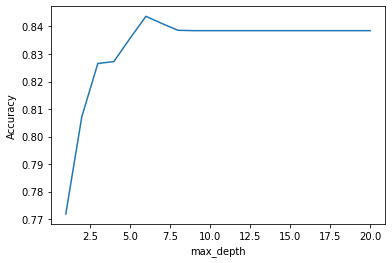

In [24]:
# Celda 5


bikes['season'] = bikes['season'].astype(int)
X = bikes.loc[:,['season','hour']]
y = (bikes.total > bikes['total'].median()).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)
# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []


# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=6, scoring='accuracy').mean())
    

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')    

In [25]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.8436851355497798, 6)

In [26]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=5, random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [27]:
X.columns

Index(['season', 'hour'], dtype='object')

In [28]:
# Uso de la función .feature_importances_ para obtener la importancia de cada variable
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_}).sort_values('importance')

,feature,importance
0,season,0.15
1,hour,0.85


Al comparar los 2 modelos, vemos que el arbol genera un accuary del 84% vs el R2 de la regresión lineal que se encuentra en 22%.  Esto puede verse infludo por el hecho de intentar predecir una variable continua, con 2 variables (season, hour) que tienen comportamientos categóricos.  Este tipo de escenarios tienen mejor comportamiento en los árboles de desición, dado que su desempeño con variables categóricas es mejor.

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [29]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.00,9.00,188.00,0.73,1.00,0.84,5.00,1.00,1.00,...,0.20,0.80,-0.49,-0.60,-0.25,0.90,0.80,0.40,0.80,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.00,7.00,297.00,0.65,1.00,0.82,9.00,4.00,1.00,...,0.16,0.50,-0.14,-0.40,-0.05,0.10,-0.10,0.40,0.10,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.00,11.00,181.00,0.66,1.00,0.78,4.00,3.00,1.00,...,0.14,1.00,0.00,0.00,0.00,0.30,1.00,0.20,1.00,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.00,12.00,781.00,0.50,1.00,0.68,10.00,3.00,1.00,...,0.10,1.00,-0.20,-0.40,-0.07,0.00,0.00,0.50,0.00,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.00,8.00,177.00,0.69,1.00,0.83,3.00,2.00,1.00,...,0.10,0.55,-0.17,-0.25,-0.10,0.00,0.00,0.50,0.00,0


In [30]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [31]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

**Arbol de decision**

Text(0.5, 0, 'max_depth')

Text(0, 0.5, 'Accuracy')

(0.6308888888888888, 2)

DecisionTreeClassifier(max_depth=2, random_state=1)

accuracy: 64.53333333333333
F1-Score: 0.6448598130841121


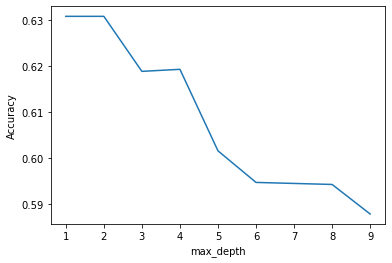

In [32]:
# Celda 6
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 10)
# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []


# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())
    

# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')   

# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)

models = {'dtc': DecisionTreeClassifier()}
# calculo y_pred
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
y_pred['dtc'] = clf.predict(X_test)

# Accuracy y F1-score
accuracy = metrics.accuracy_score(y_test, y_pred['dtc'])
accuracy_percentage = 100 * accuracy
print("accuracy: {}".format(accuracy_percentage))
print("F1-Score: {}".format(metrics.f1_score(y_pred['dtc'], y_test)))

Las métricas de desempeño del arbol permiten ver que el modelo tiene un poder predictivo del 65%, con una presición del 64%.  Adicionalmente observamos que el mejor desempeño lo obtiene con un max_depth de 2

**Regresión logística**

In [33]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
#print("Coeficiente:", list(zip(X.columns, model.coef_.flatten(), )))
print("Accuracy de entrenamiento:", model.score(X_train, y_train))

LogisticRegression()

Intercept: [-6.63184394e-08]
Accuracy de entrenamiento: 0.6131111111111112


In [34]:
predicciones = model.predict(X_test)
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")
print("F1-Score: {}".format(metrics.f1_score(predicciones, y_test)))



El accuracy de test es: 61.199999999999996%
F1-Score: 0.6083445491251682


La regresión logística obtiene un accuary del 62%, por debajo del 65% que obtuvo el arbol, mostrando así que este último tiene un mejor desempeño

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [35]:
# Celda 7
# Definición del modelo BaggingClassifier de la libreria sklearn
from sklearn.ensemble import BaggingClassifier


clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 6 ), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
a1 = metrics.accuracy_score(y_pred, y_test)
f1 = metrics.f1_score(y_pred, y_test)
print(f'Accuray {a1}')
print(f'f1_score {f1}')



BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

Accuray 0.658
f1_score 0.657771847898599


In [36]:
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf = 20 ), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
a2 = metrics.accuracy_score(y_pred, y_test)
f2 = metrics.f1_score(y_pred, y_test)
print(f'Accuray {a2}')
print(f'f1_score {f2}')


BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=20),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

Accuray 0.654
f1_score 0.6551495016611295


In [37]:
clf = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
a3 = metrics.accuracy_score(y_pred, y_test)
f3 = metrics.f1_score(y_pred, y_test)
print(f'Accuray {a3}')
print(f'f1_score {f3}')


BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

Accuray 0.6173333333333333
f1_score 0.6116373477672531


Text(0.5, 1.0, 'Comparación Indicadores Desempeño')

<BarContainer object of 6 artists>

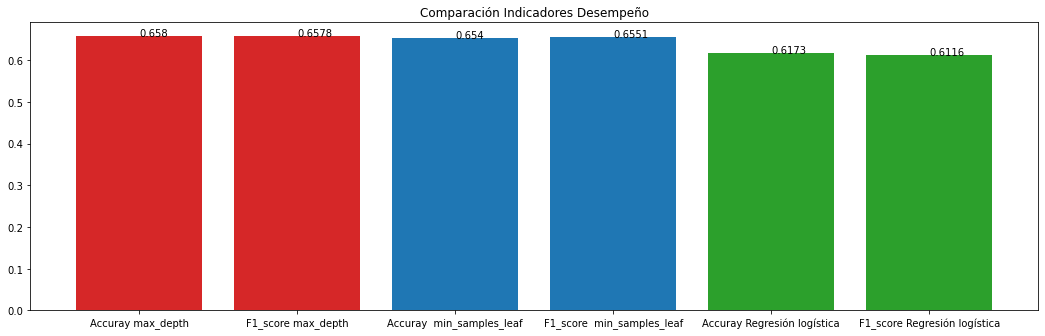

In [38]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(4)
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación Indicadores Desempeño")
ejeX = ['Accuray max_depth','F1_score max_depth',
        'Accuray  min_samples_leaf','F1_score  min_samples_leaf',
        'Accuray Regresión logística','F1_score Regresión logística'] 
ejeY = [round(a1,4),round(f1,4),round(a2,4),round(f2,4),round(a3,4),round(f3,4)]
bar_colors = ['tab:red','tab:red', 'tab:blue','tab:blue', 'tab:green', 'tab:green']
ax.bar(ejeX,ejeY, color =bar_colors )
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()



**Observaciones**

Con las configuraciones dadas, el modelo de mejor desempeño fue el primero, en el cual se realizan arboles de clasificación con max_depth = 6, con un comportamiento muy similar al de arboles con una configuración min_samples_leaf=20.

Los arboles muestran un comportamiento relativamente estable, se hicieron prueba modificando los parámetros de max_depth y min_samples_left, y las variaciones fueron muy pequeñas en el accuary el f1_score, las de mejor resultado fueron las descritas en el punto anterior.

De las 3 comparaciones, el de menor poder predictivo es la regresión logística con un accuary de 61% y un F1-score también del 61%

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [39]:
# Celda 8
# Definición del modelo BaggingClassifier de la libreria sklearn
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth = 6), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)

# Desempeño al hacer votación ponderada
a4 = metrics.accuracy_score(y_pred, y_test)
f4 = metrics.f1_score(y_pred, y_test)
print(f'Accuray {a4}')
print(f'f1_score {f4}')


BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=6),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

(0.657771847898599, 0.658)

Accuray 0.662
f1_score 0.6640159045725645


In [40]:
# Celda 8
# Definición del modelo BaggingClassifier de la libreria sklearn
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf = 20), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)


# Desempeño al hacer votación ponderada
a5 = metrics.accuracy_score(y_pred, y_test)
f5 = metrics.f1_score(y_pred, y_test)
print(f'Accuray {a5}')
print(f'f1_score {f5}')


BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=20),
                  n_estimators=100, n_jobs=-1, oob_score=True, random_state=42)

(0.6551495016611295, 0.654)

Accuray 0.6573333333333333
f1_score 0.6559571619812583


In [41]:
# Celda 8
# Definición del modelo BaggingClassifier de la libreria sklearn
clf = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

# Obtención de los pesos alpha de cada modelo de acuerdo al error OOB
errors = np.zeros(clf.n_estimators)
y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

for i in range(clf.n_estimators):
    oob_sample = ~clf.estimators_samples_[i]
    y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
    errors[i] = metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
    y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
    
alpha = (1 - errors) / (1 - errors).sum()
y_pred = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)


# Desempeño al hacer votación ponderada
a6 = metrics.accuracy_score(y_pred, y_test)
f6 = metrics.f1_score(y_pred, y_test)
print(f'Accuray {a6}')
print(f'f1_score {f6}')

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=42)

(0.6116373477672531, 0.6173333333333333)

Accuray 0.6173333333333333
f1_score 0.6121621621621622


Text(0.5, 1.0, 'Comparación Indicadores Desempeño')

<BarContainer object of 6 artists>

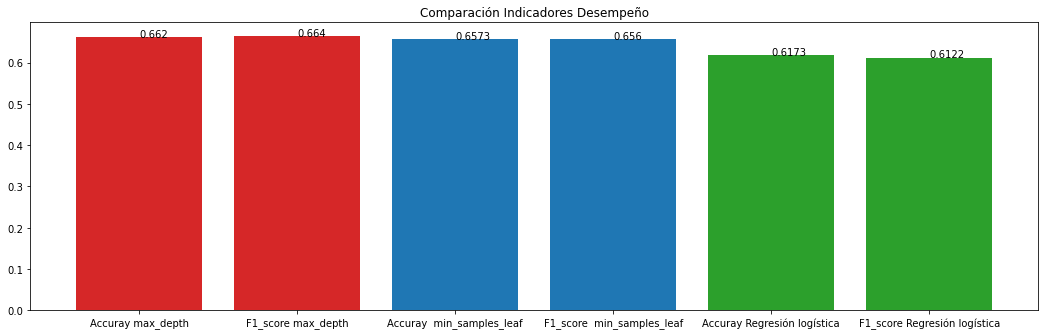

In [42]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(4)
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación Indicadores Desempeño")
ejeX = ['Accuray max_depth','F1_score max_depth',
        'Accuray  min_samples_leaf','F1_score  min_samples_leaf',
        'Accuray Regresión logística','F1_score Regresión logística'] 
ejeY = [round(a4,4),round(f4,4),round(a5,4),round(f5,4),round(a6,4),round(f6,4)]
bar_colors = ['tab:red','tab:red', 'tab:blue','tab:blue', 'tab:green', 'tab:green']
ax.bar(ejeX,ejeY, color =bar_colors )
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()



**Observaciones** 

Para la votación pondera se conservaron los mismos parámetros que para el ejercicio de votación Mayoritaria.  Nuevamente se observa que el mejor desempeño lo obtiene el arbol de desición donde se ajusta el parámetro de max_depth. Mientras que el de peor desempeño es la regresión logística.

### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

Text(0.5, 1.0, 'Comparación Indicadores Desempeño')

<BarContainer object of 12 artists>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

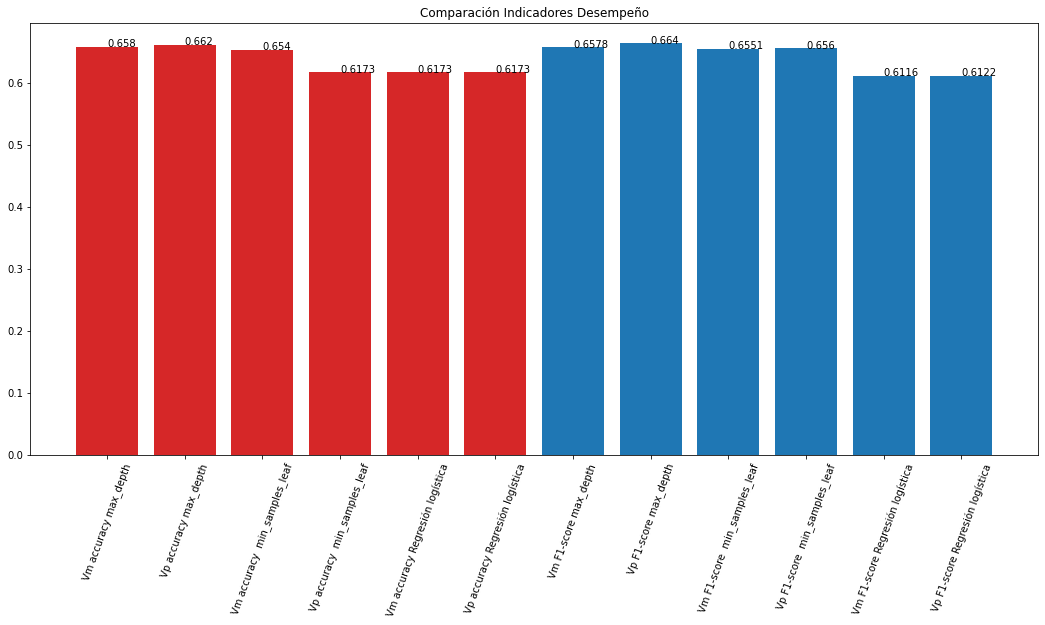

In [43]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación Indicadores Desempeño")
ejeX = ['Vm accuracy max_depth','Vp accuracy max_depth',
        'Vm accuracy  min_samples_leaf','Vp accuracy  min_samples_leaf',
        'Vm accuracy Regresión logística','Vp accuracy Regresión logística',
        'Vm F1-score max_depth','Vp F1-score max_depth',        
        'Vm F1-score  min_samples_leaf','Vp F1-score  min_samples_leaf',        
        'Vm F1-score Regresión logística','Vp F1-score Regresión logística'] 
ejeY = [round(a1,4),round(a4,4),
        round(a2,4),round(a6,4),
        round(a3,4),round(a6,4),
       round(f1,4),round(f4,4),
       round(f2,4),round(f5,4),
       round(f3,4),round(f6,4),]
bar_labels = ['accuracy', 'F1-score']
bar_colors = ['tab:red', 'tab:red','tab:red','tab:red',
              'tab:red', 'tab:red','tab:blue', 'tab:blue',
              'tab:blue', 'tab:blue','tab:blue','tab:blue']
ax.bar(ejeX,ejeY, label = bar_labels, color=bar_colors)

def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.xticks(rotation = 70)
plt.show()

Vm = Votación Mayoritaria

Vp = Votación Ponderada

**Observaciones**

Al final, ningún modelo logra un alto poder predictivo, quedando todos por debajo del 67%, sin embargo, al comparar los indicadores de desempeño, y considerando los parámetros utilizados para el ejercicio, el de mejor desempeño es el abol con Votación Ponderada ajustado el parámetro max_depth, esta combinación logra el mejor accuracy 66.2% y el mejor F1_score 66.4%

En un ejercicio más robusto, podríamos en un solo modelo combinar los parámtros establecidos para lograr incrementar el poder predictivo del modelo.
